In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
yield_data = pd.read_csv('Dataset/Imputed Data.csv')
yield_data['Time Period'] = pd.to_datetime(yield_data['Time Period']).apply(lambda x:x.strftime('%Y-%m-%d'))
yield_data.set_index('Time Period',inplace=True)
yield_data.index.name = None
yield_data.head()

,RIFLGFCY01_N.B,RIFLGFCY03_N.B,RIFLGFCY05_N.B,RIFLGFCY10_N.B,IS_WEEKEND,Day of week
1962-01-02,3.22,3.70,3.88,4.06,0,1
1962-01-03,3.24,3.70,3.87,4.03,0,2
1962-01-04,3.24,3.69,3.86,3.99,0,3
1962-01-05,3.26,3.71,3.89,4.02,0,4
1962-01-06,3.26,3.71,3.89,4.02,1,5


### Make Time Series Stationary stationary

RIFLGFCY01_N.B


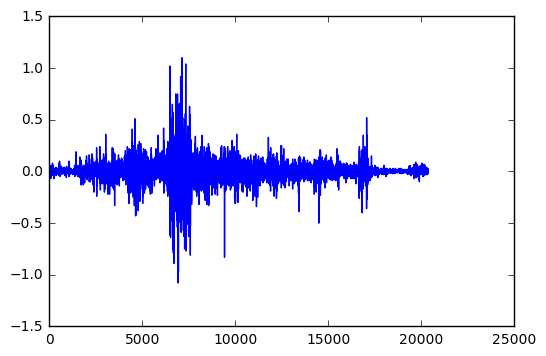

RIFLGFCY03_N.B


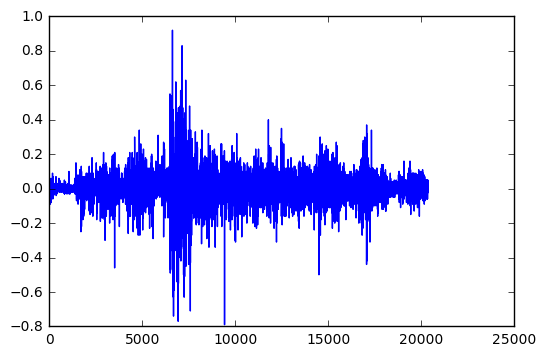

RIFLGFCY05_N.B


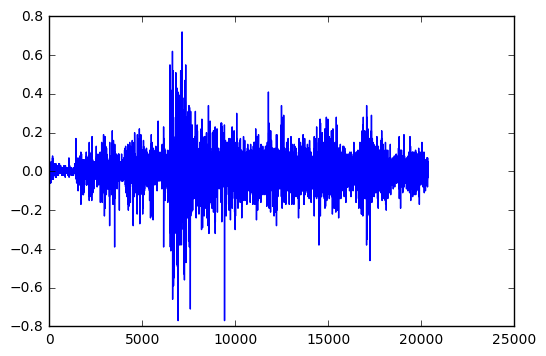

RIFLGFCY10_N.B


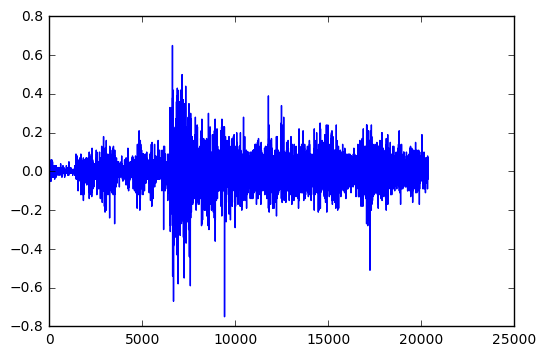

In [4]:
#data shift
shifted = yield_data-yield_data.shift()
for col in shifted.columns:
    if col not in ('IS_WEEKEND','Day of week'):
        print(col)
        plt.plot(shifted[col][1:].values)
        plt.show()
        plt.pause(0.0001)


/Users/lakshyagarg/Downloads/ENTER/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=100).mean()
  app.launch_new_instance()


RIFLGFCY01_N.B


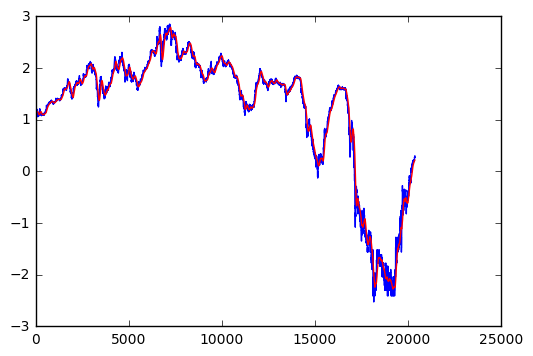

RIFLGFCY03_N.B


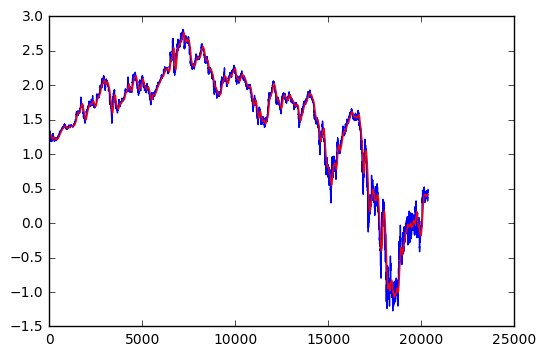

RIFLGFCY05_N.B


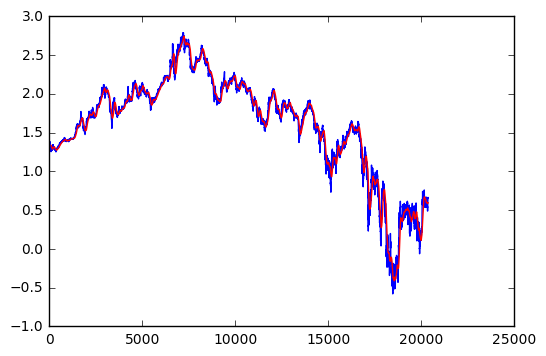

RIFLGFCY10_N.B


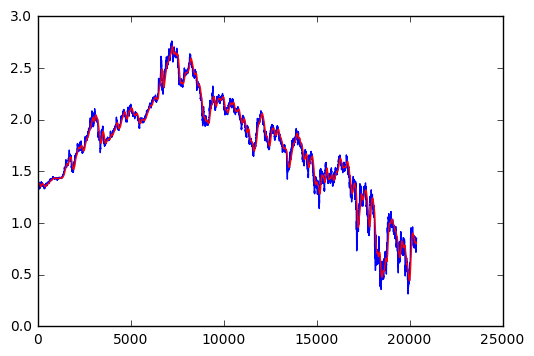

In [5]:
#moving average
log_yd=np.log(yield_data)
moving_avg = pd.rolling_mean(log_yd,100)
for col in shifted.columns:
    if col not in ('IS_WEEKEND','Day of week'):
        print(col)
        plt.plot(log_yd[col][1:].values,color='blue')
        plt.plot(moving_avg[col][1:].values,color='red')
        plt.show()
        plt.pause(0.0001)

RIFLGFCY01_N.B


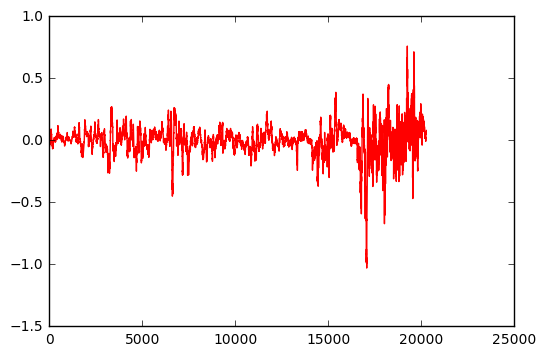

RIFLGFCY03_N.B


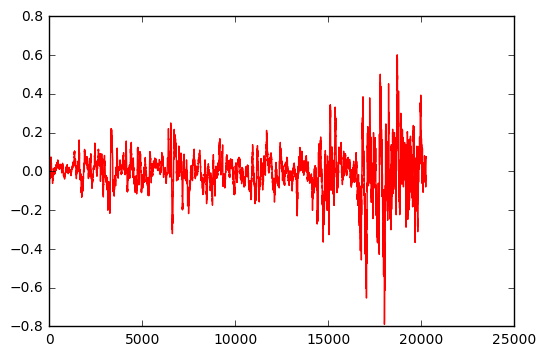

RIFLGFCY05_N.B


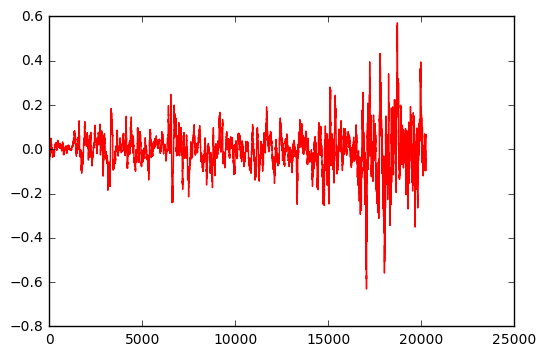

RIFLGFCY10_N.B


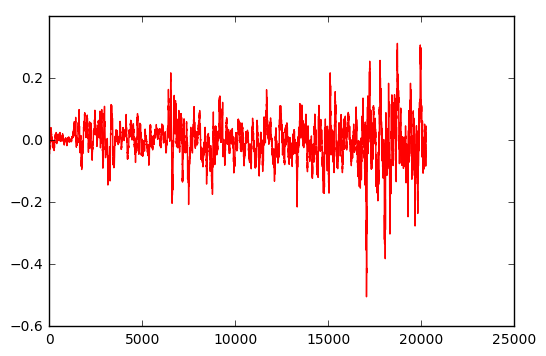

In [6]:
ts_log_moving_avg_diff = log_yd - moving_avg
ts_log_moving_avg_diff=ts_log_moving_avg_diff[['RIFLGFCY01_N.B', 'RIFLGFCY03_N.B', 'RIFLGFCY05_N.B', 'RIFLGFCY10_N.B']].dropna()
for col in shifted.columns:
    if col not in ('IS_WEEKEND','Day of week'):
        print(col)
        #plt.plot(log_yd[col][1:].values,color='blue')
        plt.plot(ts_log_moving_avg_diff[col].values,color='red')
        plt.show()
        plt.pause(0.0001)

In [7]:
ts_log_moving_avg_diff = log_yd - moving_avg
ts_log_moving_avg_diff[['RIFLGFCY01_N.B', 'RIFLGFCY03_N.B', 'RIFLGFCY05_N.B', 'RIFLGFCY10_N.B']].dropna(inplace=True)

/Users/lakshyagarg/Downloads/ENTER/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
ts_log_moving_avg_diff[['RIFLGFCY01_N.B', 'RIFLGFCY03_N.B', 'RIFLGFCY05_N.B', 'RIFLGFCY10_N.B']].dropna(axis=0,how='any')

,RIFLGFCY01_N.B,RIFLGFCY03_N.B,RIFLGFCY05_N.B,RIFLGFCY10_N.B
1962-04-11,-0.055005,-0.053231,-0.052179,-0.031769
1962-04-12,-0.054297,-0.055323,-0.051458,-0.033852
1962-04-13,-0.053527,-0.060318,-0.053509,-0.035989
1962-04-14,-0.052758,-0.059440,-0.052811,-0.035631
1962-04-15,-0.051927,-0.058509,-0.052036,-0.035199
1962-04-16,-0.051096,-0.060510,-0.051262,-0.039924
1962-04-17,-0.050264,-0.062491,-0.050487,-0.042028
1962-04-18,-0.049281,-0.064451,-0.049661,-0.044087
1962-04-19,-0.048268,-0.057457,-0.048784,-0.040882
1962-04-20,-0.047224,-0.056389,-0.047881,-0.040248


In [9]:
ts_log_moving_avg_diff.add_suffix('mvd')
yield_data['']

KeyError: ''